## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
import shap


## Disable Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Load data

In [2]:
data = pd.read_csv("/content/employee_turnover.csv")

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.isna().sum

<bound method DataFrame.sum of        satisfaction_level  last_evaluation  number_project  \
0                   False            False           False   
1                   False            False           False   
2                   False            False           False   
3                   False            False           False   
4                   False            False           False   
...                   ...              ...             ...   
14994               False            False           False   
14995               False            False           False   
14996               False            False           False   
14997               False            False           False   
14998               False            False           False   

       average_montly_hours  time_spend_company  Work_accident   left  \
0                     False               False          False  False   
1                     False               False          False  False   
2                     False               False          False  False   
3                     False               False          False  False   
4                     False               False          False  False   
...                     ...                 ...            ...    ...   
14994                 False               False          False  False   
14995                 False               False          False  False   
14996                 False               False          False  False   
14997                 False               False          False  False   
14998                 False               False          False  False   

       promotion_last_5years  sales  salary  
0                      False  False   False  
1                      False  False   False  
2                      False  False   False  
3                      False  False   False  
4                      False  False   False  
...                      ...    ...     ...  
14994                  False  False   False  
14995                  False  False   False  
14996                  False  False   False  
14997                  False  False   False  
14998                  False  False   False  

[14999 rows x 10 columns]>

In [8]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
data.shape

(14999, 10)

In [11]:
data = data.rename(columns = {'sales':'department'})

In [12]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])

## Creating Variables for Categorical Variables

In [14]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [15]:
data.drop(data.columns[[8, 9]], axis=1, inplace=True)
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [16]:
data_vars=data.columns.values.tolist()
y=['left']
X=[i for i in data_vars if i not in y]

## Feature Selection for Employee Turnover Prediction

In [17]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(data[X], data[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [18]:
cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']
X = data[cols]
y = data['left']

## Logistic Regression Model to Predict Employee Turnover

### Data Splitting

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state=0)

### Model Initilization

In [20]:
logreg = LogisticRegression()

### Fitting Model to Data

In [21]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [22]:
logreg.score(xtrain, ytrain)

0.7658824649966663

In [23]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(ytest, logreg.predict(xtest))))

Logistic regression accuracy: 0.770


## Random Forest Classification Model

### Model Initilization

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [26]:
##SVM models

In [27]:
rf.score(xtrain, ytrain)

0.9972378321744928

In [28]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(ytest, rf.predict(xtest))))

Random Forest Accuracy: 0.978


In [33]:
from sklearn.svm import SVC
svm = SVC()


In [34]:
svm.fit(xtrain, ytrain)

SVC()

In [35]:
svm.score(xtrain, ytrain)

0.9072292599295171

In [39]:
print('SVM Accuracy: {:.3f}'.format(svm_accuracy))

SVM Accuracy: 0.950


## Confusion Matrix

### RF Model

In [40]:
print(classification_report(ytest, rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 1.0, 'Random Forest')

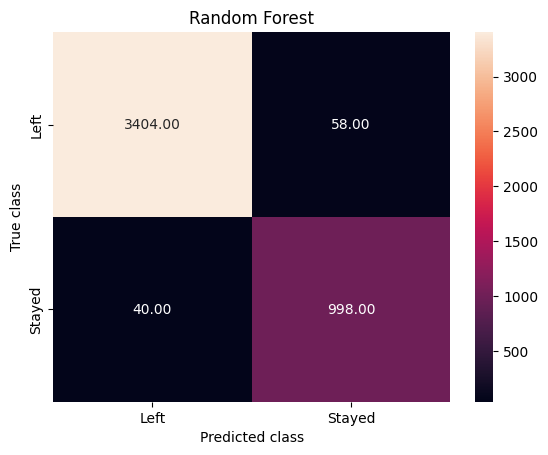

In [41]:
ypred = rf.predict(xtest)
rf_cm = confusion_matrix(ytest, ypred)
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

### Logistic Regression

In [42]:
print(classification_report(ytest, logreg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'Logistic Regression')

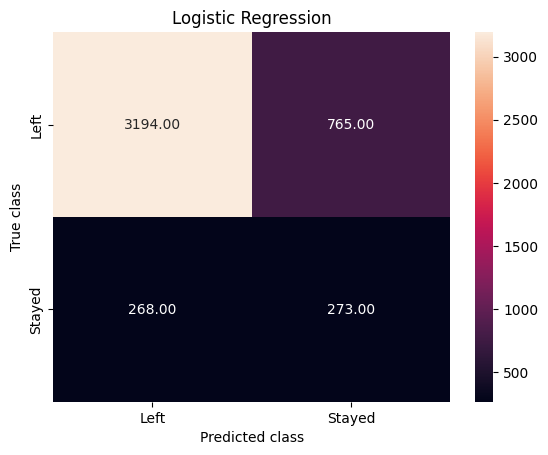

In [43]:
logreg_y_pred = logreg.predict(xtest)
logreg_cm = confusion_matrix(logreg_y_pred, ytest)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')



In [48]:
print(classification_report(ytest, ypred, target_names=["Left", "Stayed"]))

              precision    recall  f1-score   support

        Left       0.99      0.98      0.99      3462
      Stayed       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



SVM accuracy: 0.907


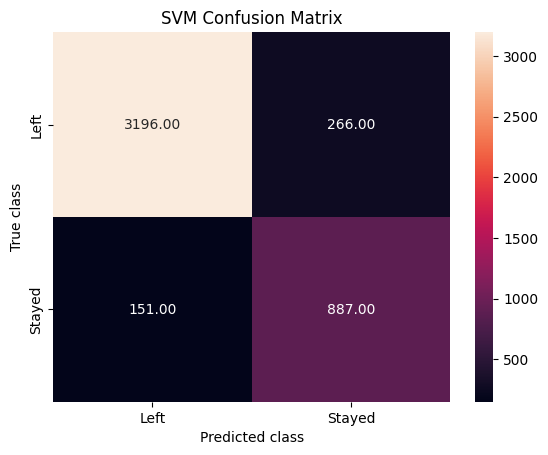

In [49]:
svm_predictions = svm.predict(xtest)
svm_accuracy = accuracy_score(ytest, svm_predictions)
print('SVM accuracy: {:.3f}'.format(svm_accuracy))
svm_cm = confusion_matrix(ytest, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVM Confusion Matrix')
plt.show()

## Employee Turnover Prediction Curve(ROC and AUC)

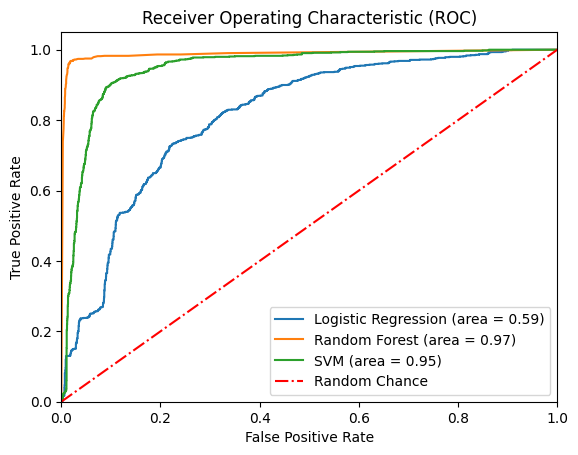

In [50]:
logit_roc_auc = roc_auc_score(ytest, logreg.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(xtest)[:, 1])
rf_roc_auc = roc_auc_score(ytest, rf.predict(xtest))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(ytest, rf.predict_proba(xtest)[:, 1])
svm_roc_auc = roc_auc_score(ytest, svm.decision_function(xtest))
svm_fpr, svm_tpr, svm_thresholds = roc_curve(ytest, svm.decision_function(xtest))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], 'r-.', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [51]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.24%
promotion_last_5years-0.25%
department_RandD-0.31%
department_hr-0.31%
salary_high-0.74%
salary_low-1.25%
Work_accident-1.55%
last_evaluation-18.92%
time_spend_company-27.33%
satisfaction_level-49.11%


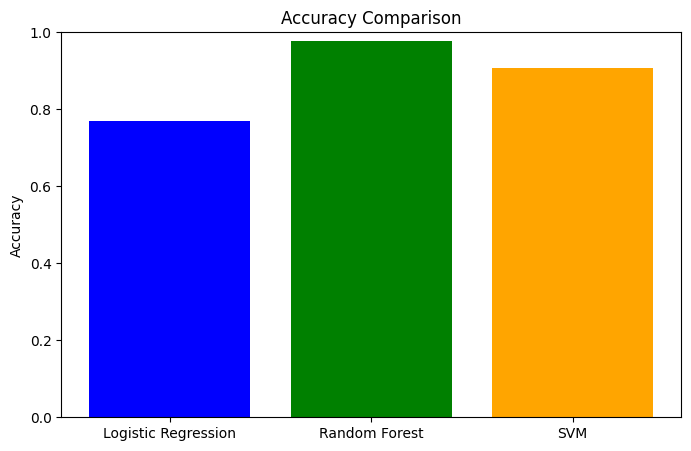

In [52]:
## Predictions and Accuracy Scores
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'SVM': svm}
accuracies = {}

for model_name, model in models.items():
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    accuracies[model_name] = accuracy

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


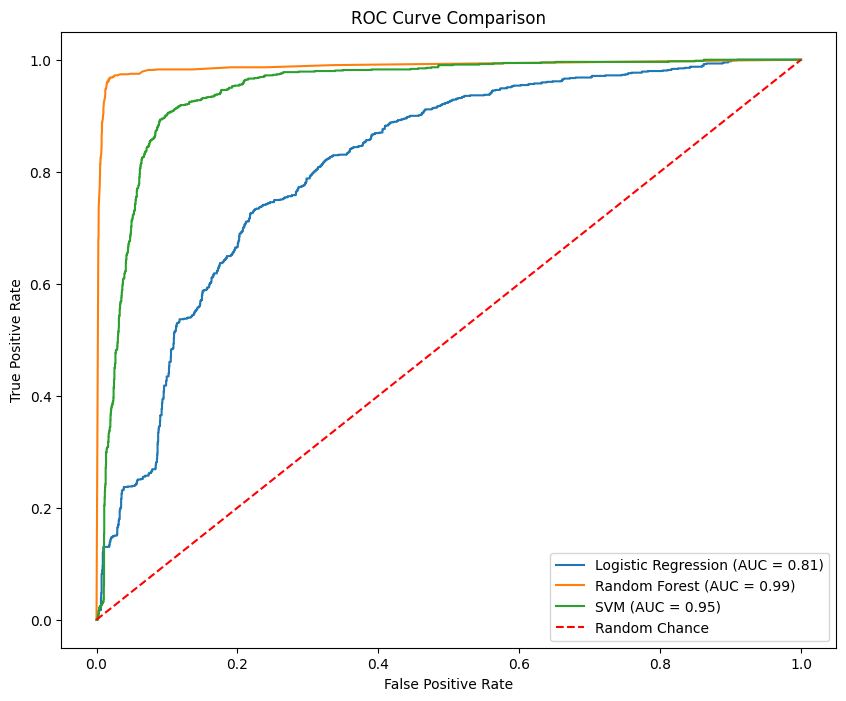

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    if hasattr(model, "decision_function"):
        yprob = model.decision_function(xtest)
    elif hasattr(model, "predict_proba"):
        yprob = model.predict_proba(xtest)[:, 1]
    else:
        continue

    fpr, tpr, _ = roc_curve(ytest, yprob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--', label="Random Chance")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


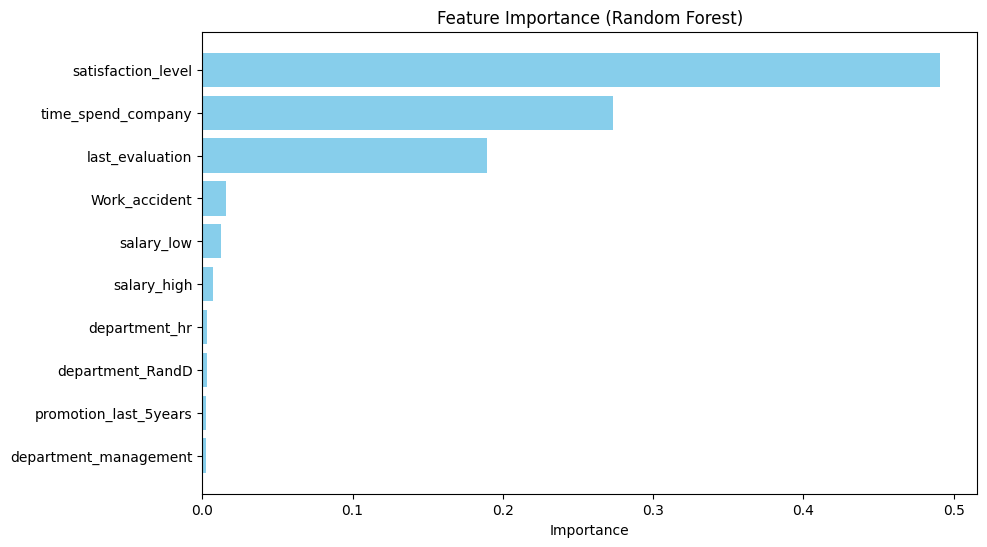

In [55]:
# 1. Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances[indices], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

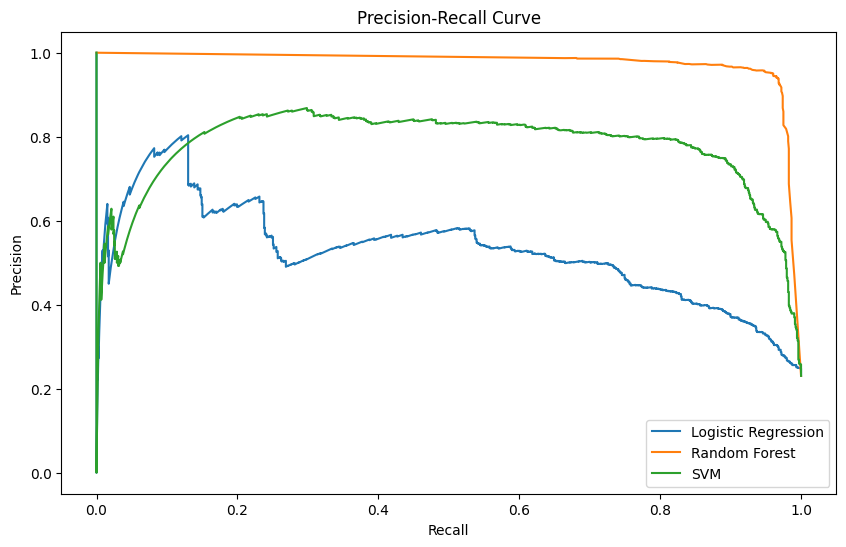

In [56]:
# 2. Precision-Recall Curve
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if model_name == "SVM":
        yprob = model.decision_function(xtest)
    else:
        yprob = model.predict_proba(xtest)[:, 1]

    precision, recall, _ = precision_recall_curve(ytest, yprob)
    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [57]:
# 3. Detailed Metrics Table
comparison_data = []
for model_name, model in models.items():
    ypred = model.predict(xtest)
    report = classification_report(ytest, ypred, output_dict=True)
    accuracy = accuracy_score(ytest, ypred)
    comparison_data.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (avg)": report["weighted avg"]["precision"],
        "Recall (avg)": report["weighted avg"]["recall"],
        "F1-Score (avg)": report["weighted avg"]["f1-score"],
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
                 Model  Accuracy  Precision (avg)  Recall (avg)  \
0  Logistic Regression  0.770444         0.737074      0.770444   
1        Random Forest  0.978222         0.978395      0.978222   
2                  SVM  0.907333         0.912076      0.907333   

   F1-Score (avg)  
0        0.742004  
1        0.978287  
2        0.908983  


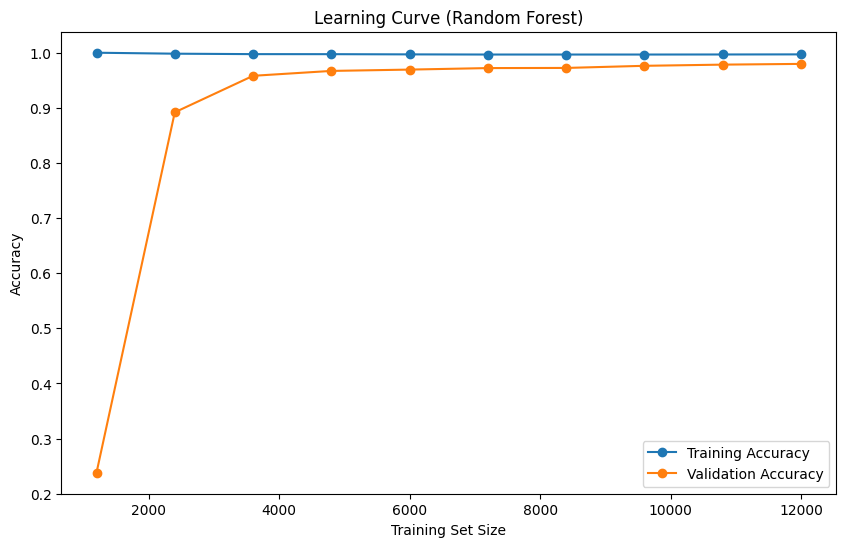

In [58]:
# 4. Learning Curve for Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='o')
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

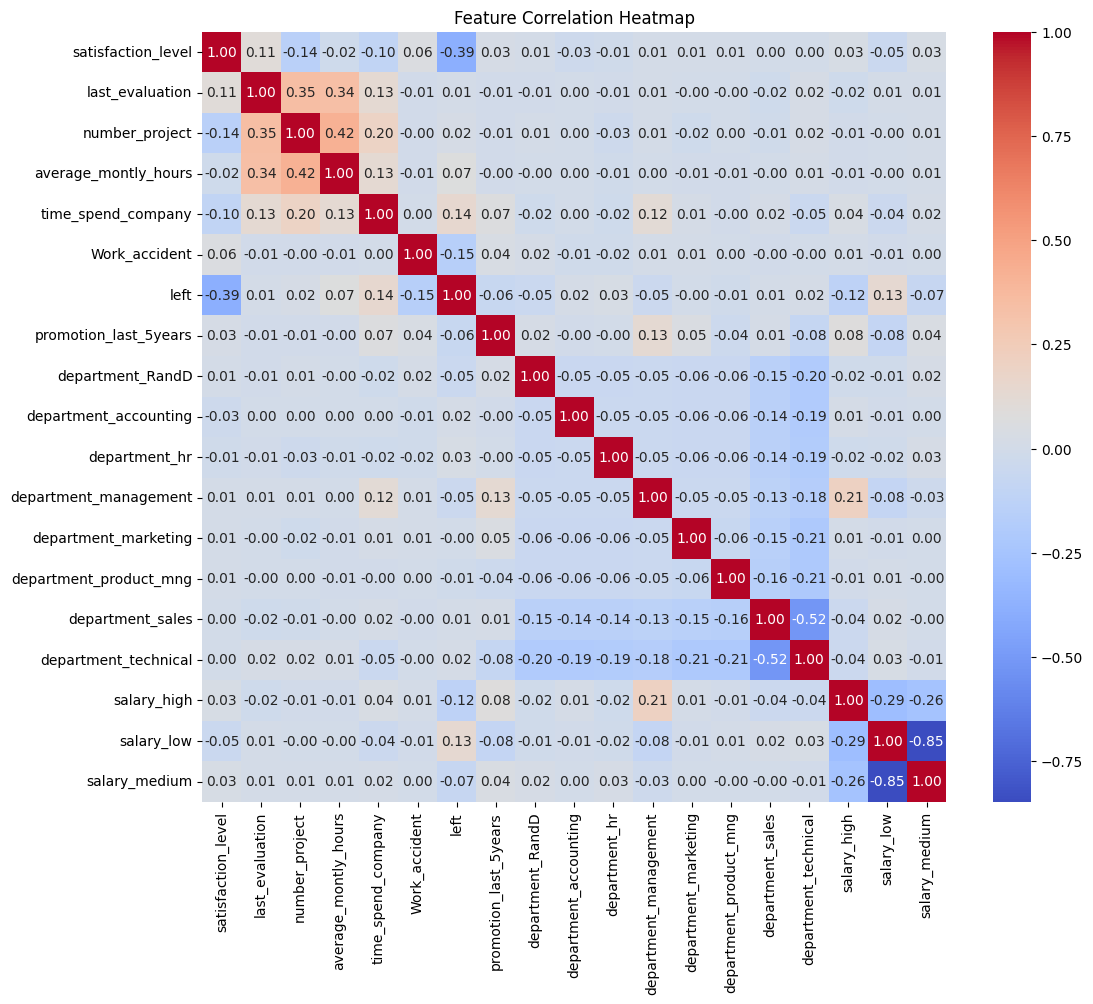

In [59]:
# 5. Feature Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

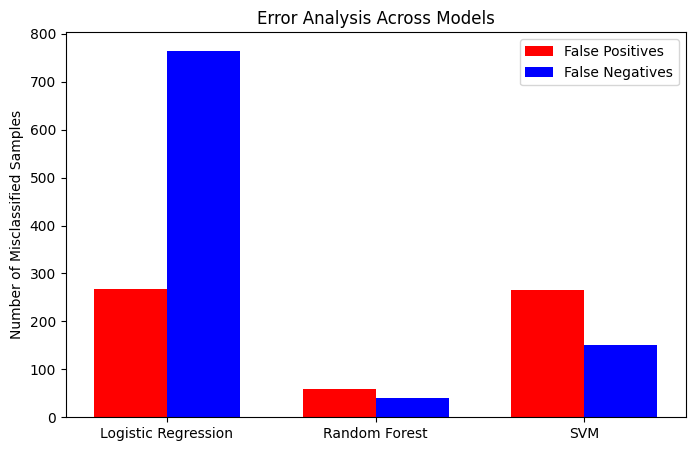

In [62]:
import numpy as np
import matplotlib.pyplot as plt

misclassified = {}

for model_name, model in models.items():
    y_pred = model.predict(xtest)
    fp = sum((y_pred == 1) & (ytest == 0))
    fn = sum((y_pred == 0) & (ytest == 1))
    misclassified[model_name] = {"False Positives": fp, "False Negatives": fn}

labels = list(misclassified.keys())
fp = [misclassified[m]["False Positives"] for m in labels]
fn = [misclassified[m]["False Negatives"] for m in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width / 2, fp, width, label="False Positives", color="red")
plt.bar(x + width / 2, fn, width, label="False Negatives", color="blue")
plt.xticks(x, labels)
plt.ylabel("Number of Misclassified Samples")
plt.title("Error Analysis Across Models")
plt.legend()
plt.show()


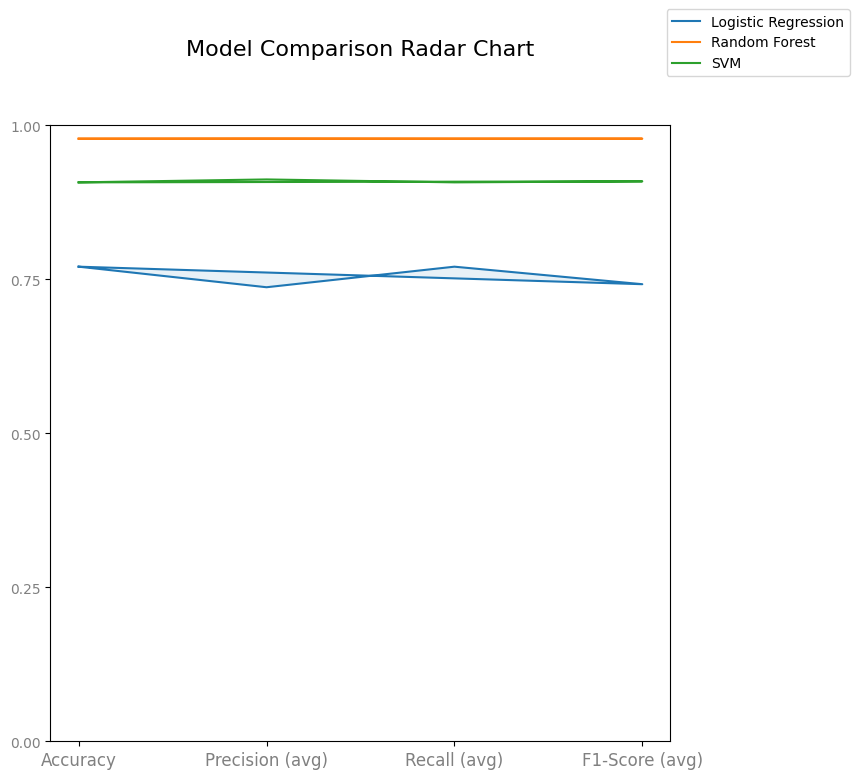

In [63]:
# 4. Model Comparison Radar Chart
from math import pi

metrics_df = comparison_df.drop(columns="Model")
categories = list(metrics_df.columns)
num_categories = len(categories)

angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in metrics_df.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    plt.plot(angles, values, label=comparison_df.iloc[i]["Model"])
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, color="grey", size=12)
plt.yticks(np.linspace(0, 1, 5), color="grey", size=10)
plt.title("Model Comparison Radar Chart", size=16, color="black", y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.2))
plt.show()